<a href="https://colab.research.google.com/github/nlei1/nlp-notebooks/blob/main/reddit_w2v.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import gensim
from gensim.models import Word2Vec 
from gensim.models import KeyedVectors
import pandas as pd
from nltk.tokenize import RegexpTokenizer
import gensim.downloader as api
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [30]:
url1 = 'https://raw.githubusercontent.com/nlei1/csvs-for-proj/main/noi.csv'
drugs = pd.read_csv(url1, error_bad_lines=False)
url2 = 'https://raw.githubusercontent.com/nlei1/csvs-for-proj/main/data.csv'
df = pd.read_csv(url2, error_bad_lines=False)


In [31]:
review_text = df.chunk.apply(gensim.utils.simple_preprocess)
review_text

0       [feedback, ambien, stilnox, vs, belsomra, hi, ...
1       [years, of, insomnia, and, what, finally, made...
2       [is, it, too, early, for, me, to, taper, off, ...
3       [insomnia, every, time, need, to, wake, up, ea...
4       [just, started, taking, very, low, dose, mirta...
                              ...                        
1552    [decided, to, make, big, cup, of, herbal, tea,...
1553    [can, sleep, again, haven, been, able, to, sle...
1554    [melatonin, doesn, work, ambien, doesn, work, ...
1555    [anybody, here, tried, thyme, the, herb, ve, h...
1556    [cbn, for, long, term, sleep, problems, any, e...
Name: chunk, Length: 1557, dtype: object

In [32]:
model = gensim.models.Word2Vec(
    window=10,
    min_count=2,
    workers=4
)

In [33]:
model.build_vocab(review_text, progress_per=1000)

In [34]:
model.train(review_text, total_examples=model.corpus_count, epochs=model.epochs)

(1158896, 1543585)

In [35]:
def get_embeddings(to_embed):
  embeddings = []
  for drug in to_embed:
    embeddings.append(model[drug.lower()])
  return embeddings

def get_pca(embeddings):
  pca = PCA(n_components=2)
  pca_result = pca.fit_transform(embeddings)
  post_pca = pd.DataFrame(pca_result, columns = ['x','y'])
  return post_pca

def get_tsne(embeddings, p_perplexity=1, p_n_iter=1500):
  tsne = TSNE(n_components=2, perplexity=p_perplexity, n_iter=p_n_iter)
  tsne_result = tsne.fit_transform(embeddings)
  post_tsne = pd.DataFrame(tsne_result, columns = ['x','y'])
  return post_tsne

def plot_with_labels(post_reduction):
  post_reduction_annotated = post_reduction.join(pd.DataFrame(drugs, columns=['names']))
  ax = post_reduction_annotated.plot(x='x',y='y',kind='scatter',figsize=(10,10))
  post_reduction_annotated[['x','y','names']].apply(lambda x: ax.text(*x),axis=1)

embeddings = get_embeddings(drugs["names"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


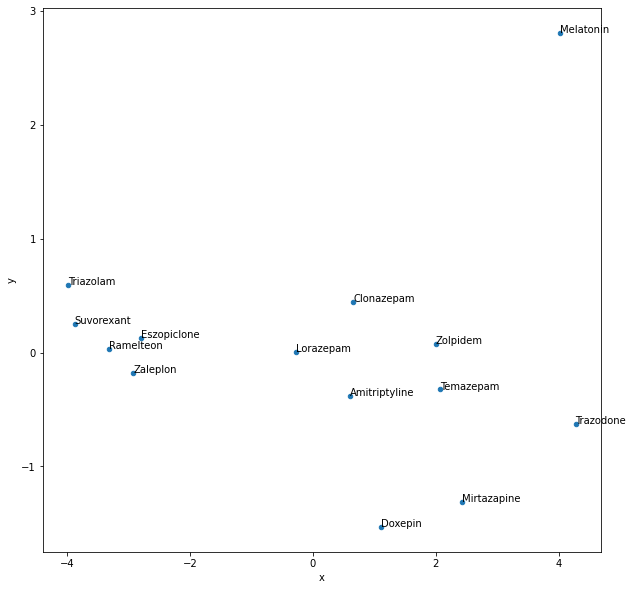

In [36]:
plot_with_labels(get_pca(embeddings))

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


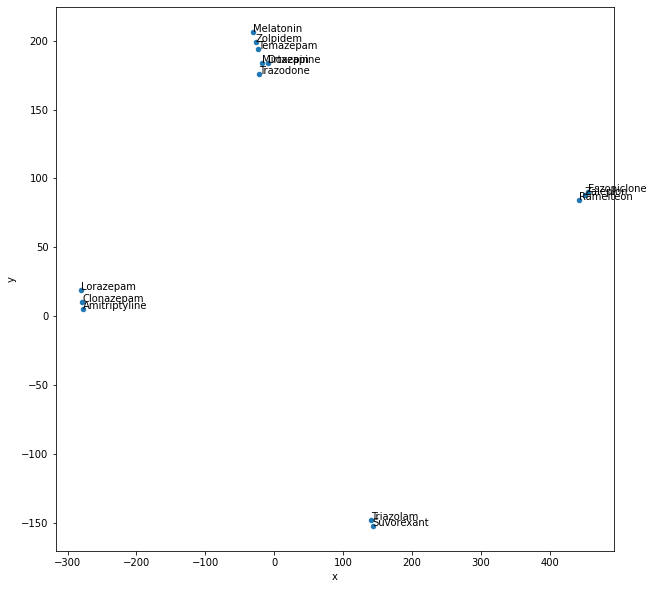

In [37]:
plot_with_labels(get_tsne(embeddings, p_perplexity=1, p_n_iter=2000))